<a href="https://colab.research.google.com/github/goulartsursula/DisciplinasUERJ/blob/master/Estrutura%20da%20Materia%203/AtenuacaoGama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estrutura da Matéria III

Modalidade: Experimental

Alunos: Danielle Lessa, Tayan Sequeira e Úrsula Goulart

Professor: Dr. Wagner de Paula

#Experimento 3: Atenuação Gama


Objetivos: 

1. Medir a atenuação da radiação γ em função da espessura do material interposto entre a fonte e o
detector para diferentes materiais e energias da radiação.
2. Comparar os valores obtidos com valores tabelados.
3. Estudar a dependência da atenuação com a energia e com o número atômico Z do material
absorvedor.

| Placa | Espessura da Placa (Polegadas) |  Contagens [Cs-137 \ 0,032 MeV] |
| :---: | :----------------------------: |  :--------: |
|   -   |               -                |     3400    |
|   G   |             0,020              |     3000    |
|   I   |             0,025              |     2820    |
|   K   |             0,032              |     2480    |
|   M   |             0,040              |     2100    |
|   O   |             0,050              |     1860    |
|   P   |             0,063              |     1800    |


A atenuação pode ser escrita como:

$$I = I_0 e^{-\mu x} \ \ \ \ \ \ \ \ (1)$$ 

Sendo,

$I$ : Intensidade ou número de contagens atenuado

$I_0$: Número de contagens sem atenuação

$\mu$: Coeficiente de atenuação linear

$x$: Espessura da placa

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

## Determinação do coeficiente de atenuação linear - Via ajuste linear

Plotar gráfico da espessura pela contagem, afim de mostrar que seguem uma exponencial decrescente, isto sendo confirmado, é necessário estimar o coeficiente de atenuação linear.

**Observação:** A primeira linha foi excluída e foi deixado apenas as contagens dos picos atenuados.

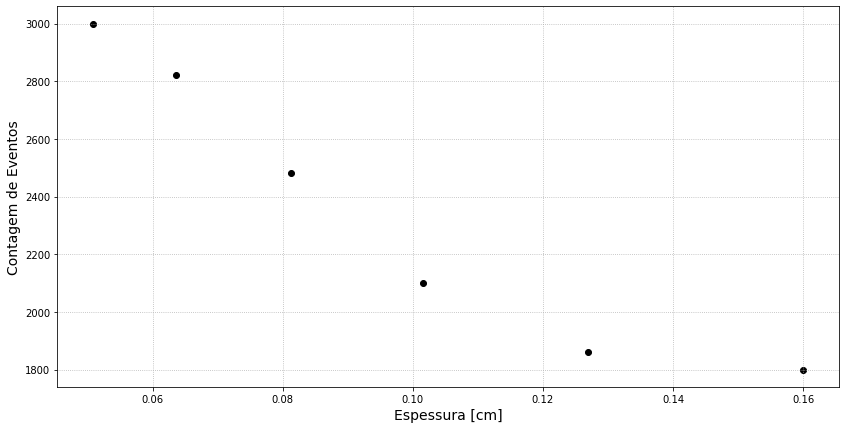

In [86]:
data = pd.read_table('cs137.tsv', ',')
data['espessura(cm)'] = data['espessura']*2.54
data_missing_row = data.drop(data.index[[0]])

fig, ax = plt.subplots(figsize = (14,7))
plt.scatter(data_missing_row['espessura(cm)'], data_missing_row['contagens'], color='black')
plt.xlabel('Espessura [cm]', fontsize = 14)
plt.ylabel('Contagem de Eventos', fontsize = 14)
plt.grid(linestyle = 'dotted')


Aplicando logaritmo nos extremos da equação (1), tem-se que:

$$\frac{I}{I_0} = e^{-μ x}$$

$$ln (\frac{I}{I_0}) = - μ x \ \ \ \ \ \ (2)$$

A equação (2) é semelhante a uma equação polinomial de grau 1, sendo possível realizar um ajuste linear, afim de obter o coeficiente de atenuação linear.

Fazendo

$$y = ln (\frac{I}{I_0})$$


Logo,

$$y = -μ x$$

In [87]:
def ajuste_linear(x_a, a, b):
  return a*x_a + b

popt_al, pcov_al  = curve_fit(ajuste_linear, data['espessura(cm)'], np.log(data['contagens']/data['contagens'][0]))

error_pcov = [np.sqrt(pcova[i, i]) for i in np.arange(2)] #Diagonal principal da matriz

popt_al, error_pcov

(array([-4.55117987,  0.04429356]), [0.4968988892075187, 0.04798439975549921])

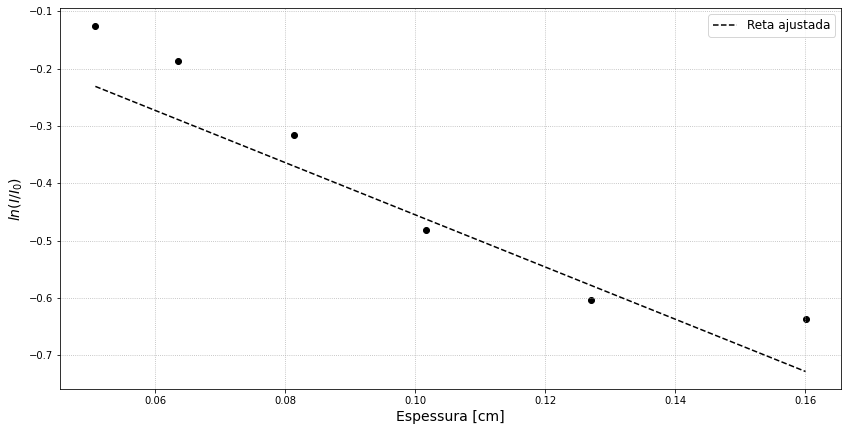

In [97]:
fig,ax = plt.subplots(figsize = (14,7))

plt.scatter(data_missing_row['espessura(cm)'], np.log(data_missing_row['contagens'] / data['contagens'][0]), color='black')
plt.plot(data_missing_row['espessura(cm)'], popt_al[0]*data_missing_row['espessura(cm)'], linestyle = '--', color = 'black', label = 'Reta ajustada')
#plt.errorbar(data_missing_row['espessura(cm)'], np.log(data_missing_row['contagens'] / data['contagens'][0]), yerr = error_pcov[0], fmt = 'o',color = 'black', ecolor = 'lightgreen', elinewidth = 5, capsize=10)
plt.xlabel('Espessura [cm]', fontsize = 14)
plt.ylabel('$ln(I/I_0)$', fontsize=14)
plt.grid(linestyle = 'dotted')
plt.legend(fontsize = 12)

## Estimando a intensidade (número de contagens após as atenuações)

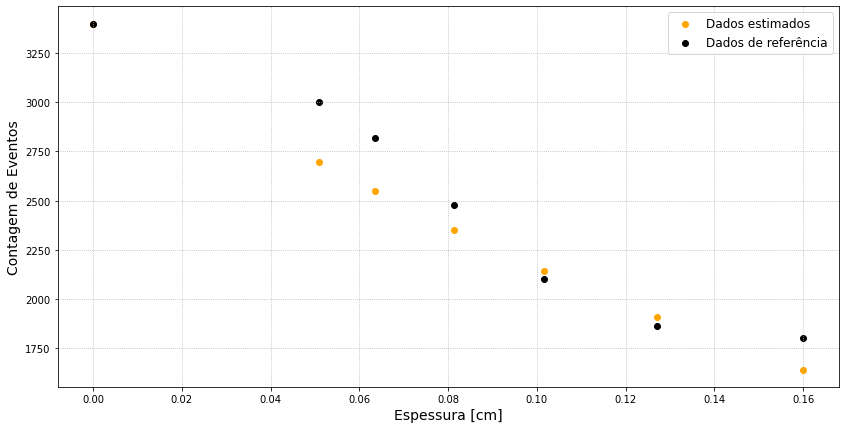

In [92]:
intensidade1 = data['contagens'][0] * np.exp(popt_al[0]*data['espessura(cm)'])

fig = plt.subplots(figsize = (14,7))

plt.scatter(data['espessura(cm)'], intensidade1, color='orange', label = 'Dados estimados')
plt.scatter(data['espessura(cm)'], data['contagens'], color='black', label = 'Dados de referência')
plt.xlabel('Espessura [cm]', fontsize = 14)
plt.ylabel('Contagem de Eventos', fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(linestyle = 'dotted')

## Determinação do coeficiente de atenuação linear - Via **ajuste exponencial**

Plotar gráfico da espessura pela contagem, afim de mostrar que seguem uma exponencial decrescente, isto sendo confirmado, é necessário estimar o coeficiente de atenuação linear.

**Observação:** A primeira linha foi excluída e foi deixado apenas as contagens dos picos atenuados.

In [ ]:
def func(x, a, c, d):
    return a*np.exp(-c*x)+d

popt, pcov = curve_fit(func, data_missing_row['espessura(cm)'], data_missing_row['contagens']/data['contagens'][0], p0=(1, 4e-4, 1))
errorfunc = [np.sqrt(pcov[i, i]) for i in np.arange(3)] #Diagonal principal da matriz


In [ ]:
popt, errorfunc

In [ ]:
fig,ax = plt.subplots(figsize = (14,7))

x = np.linspace(0.050, 0.170)
plt.plot(x, func(x, *popt), linestyle='--', c='black', label='Curva ajustada')
plt.scatter(data_missing_row['espessura(cm)'], data_missing_row['contagens'] / data['contagens'][0], color='black')
plt.xlabel('Espessura [cm]', fontsize = 14)
plt.ylabel('$I/I_0$', fontsize=14)
plt.grid(linestyle = 'dotted')
plt.legend(fontsize = 12)

In [ ]:
intensidade = data['contagens'][0] * np.exp(-popt[1]*data['espessura(cm)'])

fig = plt.subplots(figsize = (14,7))

plt.scatter(data['espessura(cm)'], intensidade, color='orange', label = 'Dados estimados')
plt.scatter(data['espessura(cm)'], data['contagens'], color='black', label = 'Dados de referência')
plt.xlabel('Espessura [cm]', fontsize = 14)
plt.ylabel('Contagem de Eventos', fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(linestyle = 'dotted')